In [1]:
import tensorflow as tf

2023-01-06 07:16:51.369747: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-06 07:16:53.042627: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/src/tensorrt:/usr/lib/python3.10/dist-packages/tensorrt
2023-01-06 07:16:53.042790: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/src/tensorrt:/usr/lib/python3.10/dist-packages/tensorrt
2023-0

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [93]:
data_dir = 'LPR/images'

# Load the dataset
image_label_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  labels='inferred',
  label_mode='int',
  class_names=None,
  color_mode='rgb',
  batch_size=32,
  image_size=(32, 32),
  shuffle=True,
  seed=123,
  validation_split=0.2,
  subset='training',
  interpolation='bilinear',
  follow_links=False
)

Found 2033 files belonging to 12 classes.
Using 1627 files for training.


In [94]:
 # Determine the sizes of the train, test, and validation sets
num_train_examples = int(tf.cast(0.6 * tf.cast(image_label_ds.cardinality(),tf.float64), tf.int64))
num_test_examples = int(tf.cast(0.2 * tf.cast(image_label_ds.cardinality(),tf.float64), tf.int64))
num_val_examples = int(tf.cast(0.2 * tf.cast(image_label_ds.cardinality(),tf.float64), tf.int64))

# Split the dataset into train, test, and validation sets
train_ds = image_label_ds.take(num_train_examples)
test_ds = image_label_ds.skip(num_train_examples).take(num_test_examples)
val_ds = image_label_ds.skip(num_train_examples + num_test_examples).take(num_val_examples)


In [5]:
# train_ds.save('train_dataset.tf')
# test_ds.save('test_dataset.tf')
# val_ds.save('val_dataset.tf')

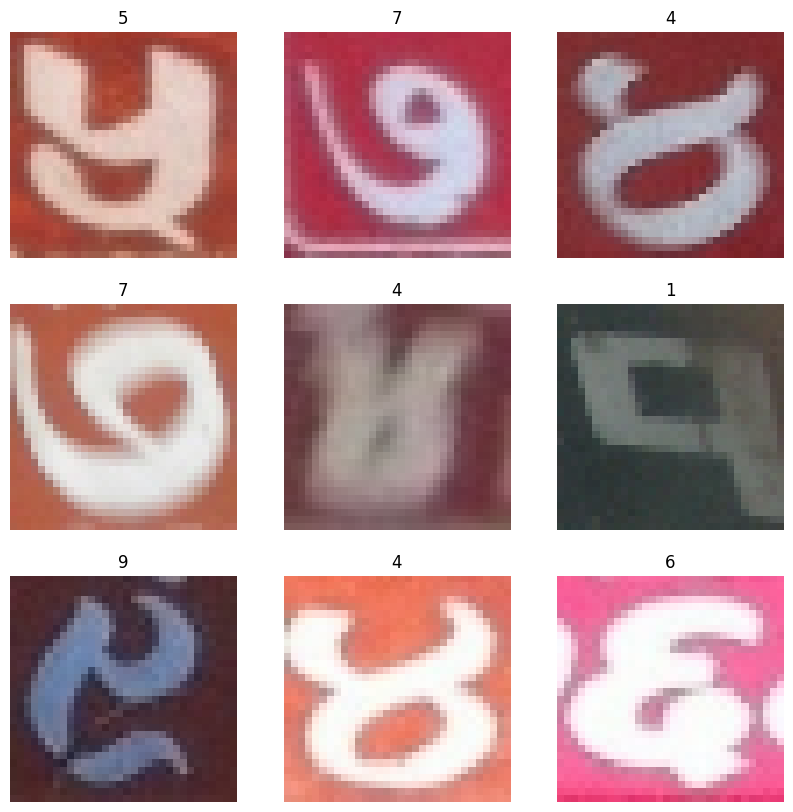

In [95]:
class_names = [0,1,2,3,4,5,6,7,8,9,"ba","pa"]
plt.figure(figsize=(10,10))
for images,labels in train_ds:
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [170]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Conv2D(32, 3, activation="relu"),
        tf.keras.layers.MaxPooling2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation="relu"),
        tf.keras.layers.Dense(12)
    ]
)


In [171]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

In [172]:
model.fit(
     train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
30/30 [==============================] - 2s 20ms/step - loss: 2.4624 - accuracy: 0.1156 - val_loss: 2.4493 - val_accuracy: 0.1375
Epoch 2/10
30/30 [==============================] - 1s 17ms/step - loss: 2.4272 - accuracy: 0.1208 - val_loss: 2.3994 - val_accuracy: 0.1531
Epoch 3/10
30/30 [==============================] - 1s 18ms/step - loss: 2.2003 - accuracy: 0.3094 - val_loss: 1.9854 - val_accuracy: 0.3969
Epoch 4/10
30/30 [==============================] - 1s 18ms/step - loss: 1.4847 - accuracy: 0.5594 - val_loss: 1.3645 - val_accuracy: 0.6344
Epoch 5/10
30/30 [==============================] - 1s 18ms/step - loss: 1.0914 - accuracy: 0.6917 - val_loss: 1.1047 - val_accuracy: 0.6750
Epoch 6/10
30/30 [==============================] - 1s 18ms/step - loss: 0.9222 - accuracy: 0.7219 - val_loss: 1.0361 - val_accuracy: 0.7281
Epoch 7/10
30/30 [==============================] - 1s 17ms/step - loss: 0.7431 - accuracy: 0.7937 - val_loss: 0.8788 - val_accuracy: 0.7812
Epoch 8/10
30

In [176]:
model.evaluate(test_ds)

10/10 [==============================] - 0s 5ms/step - loss: 0.5273 - accuracy: 0.8687


[0.5272541642189026, 0.8687499761581421]

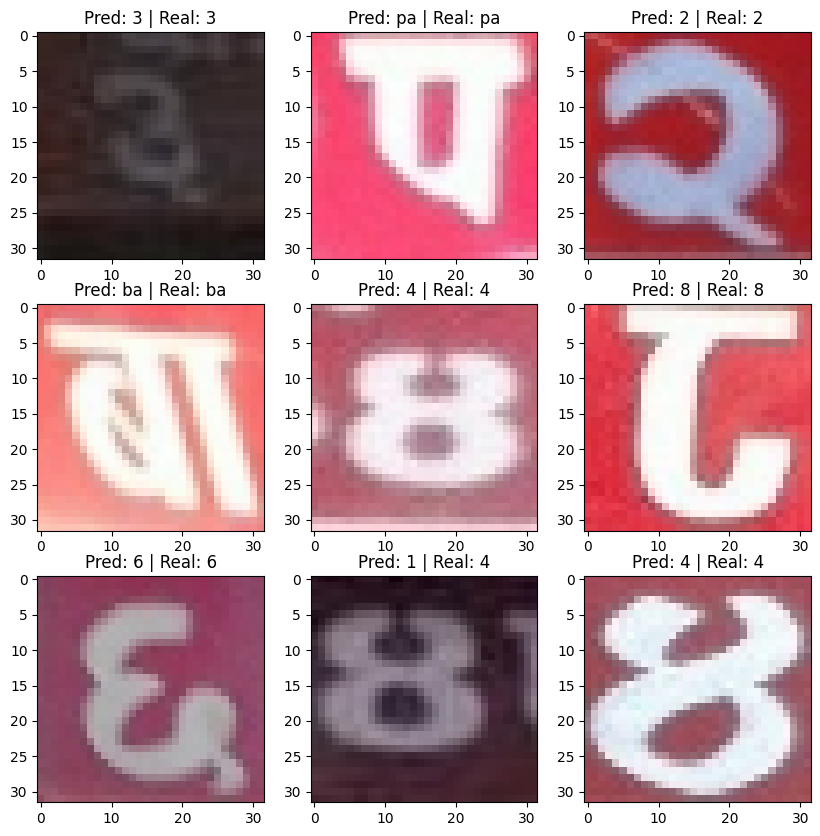

In [177]:
plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = np.argmax(classifications[i])
    plt.title("Pred: " + str(class_names[index]) + " | Real: " + str(class_names[labels[i]]))

In [178]:
from PIL import Image

In [209]:
new_img = Image.open("7.png")
testing_img = Image.new("RGB",new_img.size)
testing_img.paste(new_img)
testing_img  = testing_img.resize([32,32])
testing_img = np.array(testing_img)

In [210]:
testing_img.shape

(32, 32, 3)

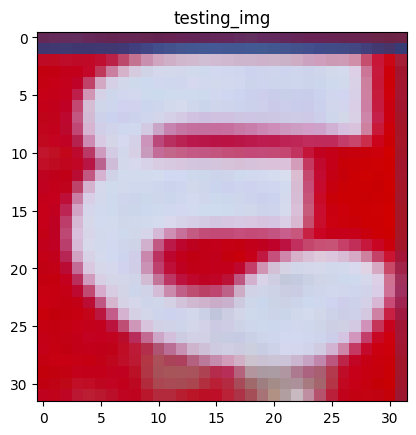

In [212]:
plt.title("testing_img")
plt.imshow(testing_img)

In [213]:
predict = model.predict(np.expand_dims(testing_img,0))

1/1 [==============================] - 0s 19ms/step


In [214]:
np.argmax(predict)

6